In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv("cleaned_bin_data.csv", parse_dates=['timestamp'])

# Select bins for forecasting
bins_to_forecast = [1511208, 1511194, 1511191]
df = df[df['Bin ID'].isin(bins_to_forecast)]

# Filter data up to May 3, 2021
train_data = df[df['timestamp'] < "2021-04-26"]
print(train_data)

        Bin ID  Fullness  fullnessThreshold  timestamp     reason  year  \
1966   1511191         0                  8 2018-06-26  NOT_READY  2018   
1967   1511191         2                  8 2018-06-27   FULLNESS  2018   
1968   1511191         0                  8 2018-06-28  NOT_READY  2018   
1969   1511191         0                  8 2018-06-29  NOT_READY  2018   
1970   1511191         0                  8 2018-06-30  NOT_READY  2018   
...        ...       ...                ...        ...        ...   ...   
18726  1511208         0                  8 2021-04-21  NOT_READY  2021   
18727  1511208         2                  8 2021-04-22   FULLNESS  2021   
18728  1511208         0                  8 2021-04-23  NOT_READY  2021   
18729  1511208         1                  8 2021-04-24  NOT_READY  2021   
18730  1511208         2                  8 2021-04-25   FULLNESS  2021   

       month  day  day_of_week  fullness_change  
1966       6   26            1              0.0  

# LSTM


In [4]:
def prepare_data(series, time_steps=7):
    X, y = [], []
    for i in range(len(series) - time_steps):
        X.append(series[i : i + time_steps])
        y.append(series[i + time_steps])
    return np.array(X), np.array(y)

In [5]:
results = {}

c:\Users\dhyey\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


C:\Users\dhyey\AppData\Local\Temp\ipykernel_29680\931792447.py:56: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_actual = daily_actual.reindex(prediction_dates).fillna(method='ffill')


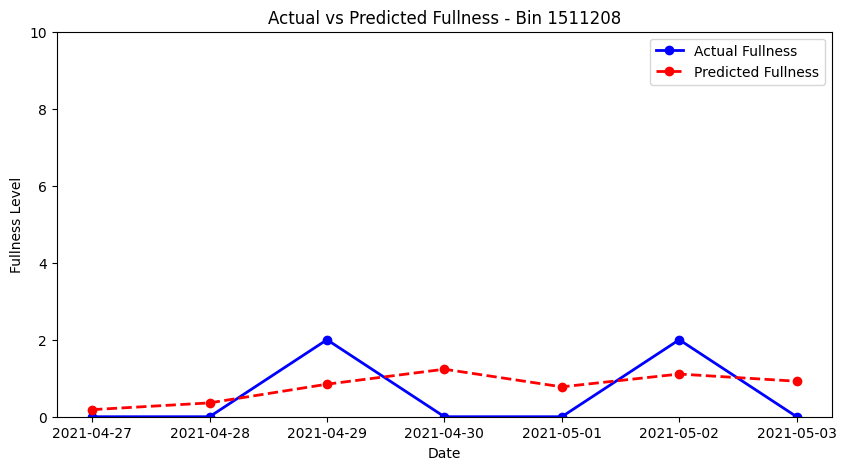

c:\Users\dhyey\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


C:\Users\dhyey\AppData\Local\Temp\ipykernel_29680\931792447.py:56: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_actual = daily_actual.reindex(prediction_dates).fillna(method='ffill')


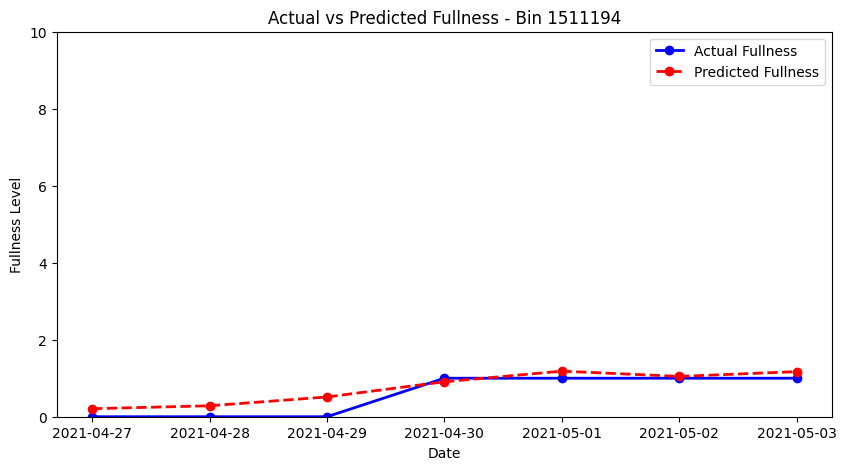

c:\Users\dhyey\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


C:\Users\dhyey\AppData\Local\Temp\ipykernel_29680\931792447.py:56: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_actual = daily_actual.reindex(prediction_dates).fillna(method='ffill')


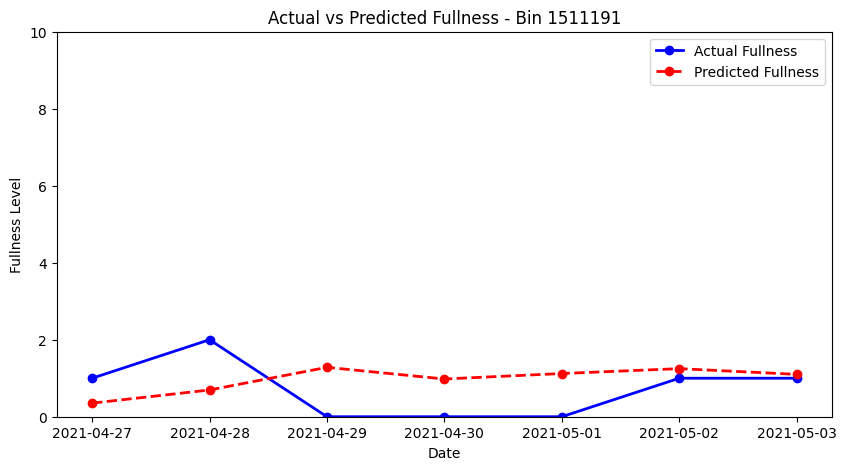

             RMSE
Bin ID           
1511208  0.867370
1511194  0.256817
1511191  0.930450


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
for bin_id in bins_to_forecast:
    bin_train = train_data[train_data['Bin ID'] == bin_id].sort_values(by='timestamp')

    # Normalize fullness values (scaling)
    scaler = MinMaxScaler()
    fullness_train = scaler.fit_transform(bin_train[['Fullness']])

    # Prepare training data
    time_steps = 7
    X_train, y_train = prepare_data(fullness_train, time_steps)

    # Reshape input for LSTM
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

    # Build improved LSTM model
    model = Sequential([
        LSTM(100, activation='relu', return_sequences=True, input_shape=(time_steps, 1)),
        Dropout(0.2),
        LSTM(100, activation='relu'),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')

    # Train the model with more epochs
    model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

    # Predict the next 7 days
    predictions = []
    last_sequence = fullness_train[-time_steps:].reshape(1, time_steps, 1)

    for _ in range(7):
        pred = model.predict(last_sequence)
        predictions.append(pred[0, 0])
        last_sequence = np.append(last_sequence[:, 1:, :], [[[pred[0, 0]]]], axis=1)

    # Inverse transform predictions
    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

    # Define prediction period: 27th April to 3rd May
    prediction_start = pd.to_datetime("2021-04-27")
    prediction_end = pd.to_datetime("2021-05-03")
    prediction_dates = pd.date_range(start=prediction_start, end=prediction_end, freq='D')
    
    # Use the full dataset for this bin and ensure 'timestamp' is datetime
    bin_full = df[df['Bin ID'] == bin_id].sort_values(by='timestamp')
    bin_full['timestamp'] = pd.to_datetime(bin_full['timestamp'])
    bin_full = bin_full.set_index('timestamp')
    
    # Resample to daily frequency, taking the last available 'Fullness' value of each day
    daily_actual = bin_full['Fullness'].resample('D').last()
    
    # Reindex to the complete prediction period (fills missing dates with NaN, then forward-fill if needed)
    daily_actual = daily_actual.reindex(prediction_dates).fillna(method='ffill')
    prediction_actual = daily_actual.values.reshape(-1, 1)
    
    # Calculate RMSE using the actual values for the prediction period
    rmse = np.sqrt(mean_squared_error(prediction_actual, predictions))
    results[bin_id] = rmse
    
    # Generate timestamps for the prediction period
    prediction_dates = pd.date_range(start="2021-04-27", end="2021-05-03", freq='D')
    
    # Plot actual vs predicted values for the prediction period
    plt.figure(figsize=(10, 5))
    plt.plot(prediction_dates, prediction_actual, 'bo-', label="Actual Fullness", linewidth=2)
    plt.plot(prediction_dates, predictions, 'ro--', label="Predicted Fullness", linewidth=2)
    plt.ylim(0, 10)
    plt.title(f"Actual vs Predicted Fullness - Bin {bin_id}")
    plt.xlabel("Date")
    plt.ylabel("Fullness Level")
    plt.legend()
    plt.show()


rmse_df = pd.DataFrame.from_dict(results, orient='index', columns=['RMSE'])
rmse_df.index.name = "Bin ID"


# Print RMSE values
print(rmse_df)

# ARIMA


c:\Users\dhyey\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dhyey\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dhyey\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dhyey\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible startin

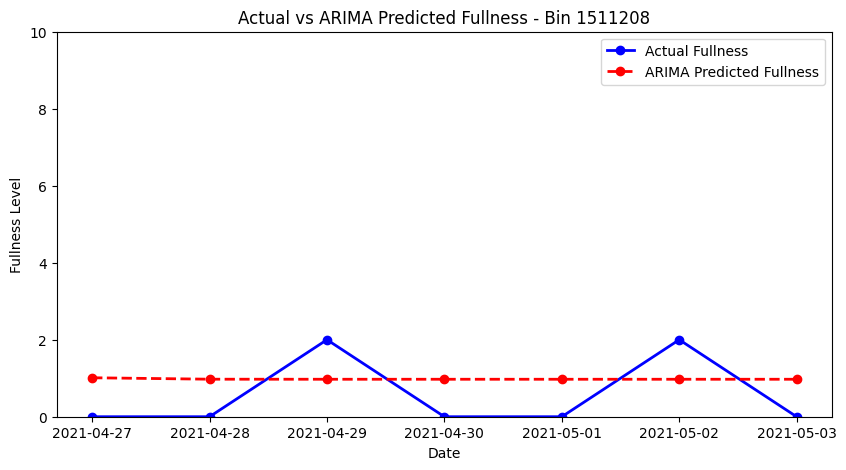

c:\Users\dhyey\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dhyey\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dhyey\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dhyey\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is ava

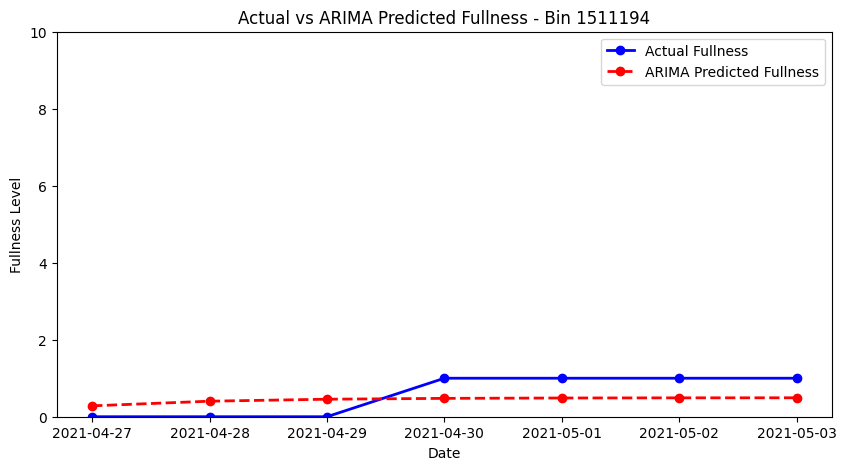

c:\Users\dhyey\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dhyey\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dhyey\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dhyey\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible startin

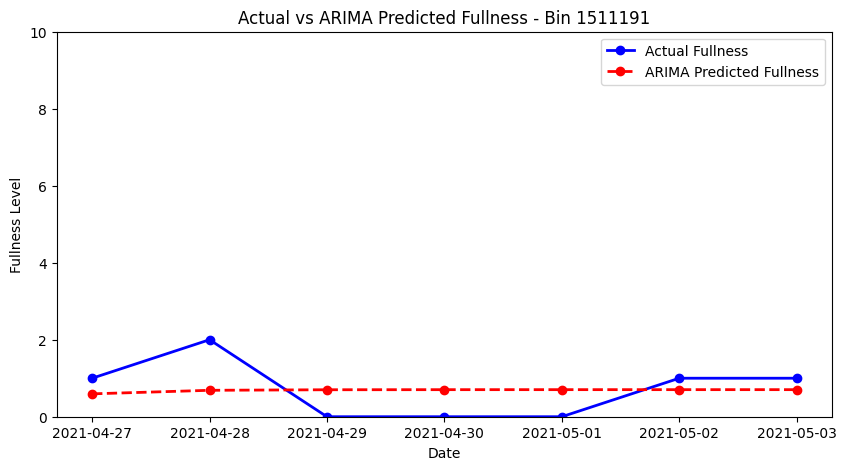

ARIMA RMSE:
             RMSE
Bin ID           
1511208  0.994504
1511194  0.463696
1511191  0.711698


In [7]:
from statsmodels.tsa.arima.model import ARIMA

results_arima = {}
for bin_id in bins_to_forecast:
    # Prepare training data for this bin
    bin_train = train_data[train_data['Bin ID'] == bin_id].sort_values(by='timestamp')
    bin_train['timestamp'] = pd.to_datetime(bin_train['timestamp'])
    bin_train = bin_train.set_index('timestamp')
    
    ts = bin_train['Fullness']
    
    # Fit an ARIMA model (order chosen here is (1,1,1); adjust if needed)
    model_arima = ARIMA(ts, order=(1,1,1))
    model_arima_fit = model_arima.fit()
    
    # Forecast next 7 days
    forecast_arima = model_arima_fit.forecast(steps=7)
    predictions_arima = forecast_arima.values.reshape(-1, 1)
    
    # Define prediction period: 27th April to 3rd May
    prediction_start = pd.to_datetime("2021-04-27")
    prediction_end = pd.to_datetime("2021-05-03")
    prediction_dates = pd.date_range(start=prediction_start, end=prediction_end, freq='D')
    
    # Use the full dataset to get actual values for this bin and prediction period
    bin_full = df[df['Bin ID'] == bin_id].sort_values(by='timestamp')
    bin_full['timestamp'] = pd.to_datetime(bin_full['timestamp'])
    bin_full = bin_full.set_index('timestamp')
    daily_actual = bin_full['Fullness'].resample('D').last()
    daily_actual = daily_actual.reindex(prediction_dates).fillna(method='ffill').fillna(method='bfill')
    prediction_actual = daily_actual.values.reshape(-1, 1)
    
    # Calculate RMSE for ARIMA predictions
    rmse_arima = np.sqrt(mean_squared_error(prediction_actual, predictions_arima))
    results_arima[bin_id] = rmse_arima

    # Plot Actual vs ARIMA Predicted Fullness
    plt.figure(figsize=(10, 5))
    plt.plot(prediction_dates, prediction_actual, 'bo-', label="Actual Fullness", linewidth=2)
    plt.plot(prediction_dates, predictions_arima, 'ro--', label="ARIMA Predicted Fullness", linewidth=2)
    plt.ylim(0, 10)
    plt.title(f"Actual vs ARIMA Predicted Fullness - Bin {bin_id}")
    plt.xlabel("Date")
    plt.ylabel("Fullness Level")
    plt.legend()
    plt.show()

# Display ARIMA RMSE values
rmse_arima_df = pd.DataFrame.from_dict(results_arima, orient='index', columns=['RMSE'])
rmse_arima_df.index.name = "Bin ID"
print("ARIMA RMSE:")
print(rmse_arima_df)


# Exponential Smoothing


c:\Users\dhyey\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dhyey\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\dhyey\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\dhyey\AppData\Local\Temp\ipykernel_29680\2295670061.py:30: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future 

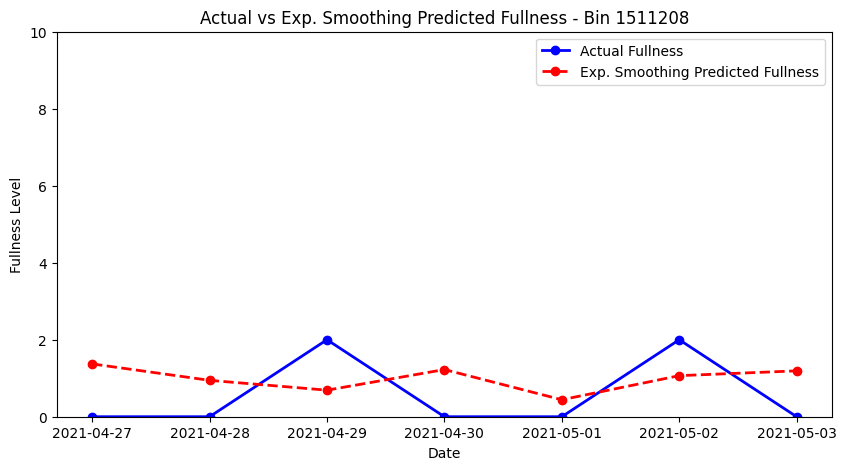

c:\Users\dhyey\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dhyey\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\dhyey\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\dhyey\AppData\Local\Temp\ipykernel_29680\2295670061.py:30: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future 

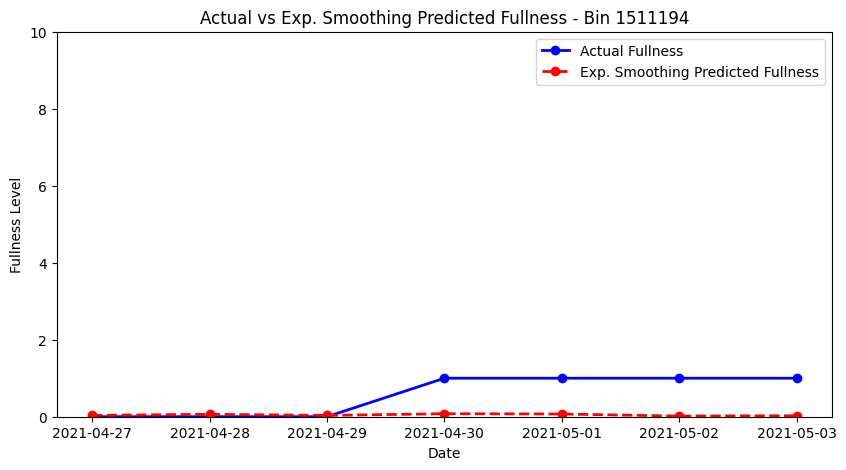

c:\Users\dhyey\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dhyey\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\dhyey\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\dhyey\AppData\Local\Temp\ipykernel_29680\2295670061.py:30: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future 

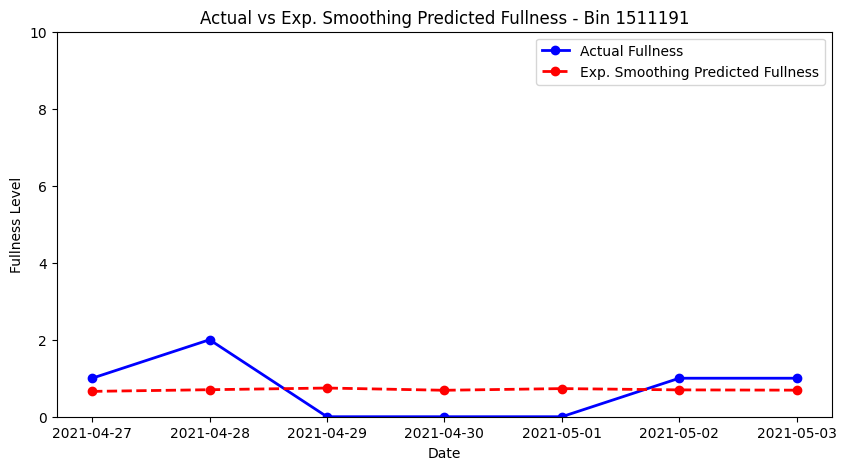

Exponential Smoothing RMSE:
             RMSE
Bin ID           
1511208  1.100649
1511194  0.720895
1511191  0.712312


In [8]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

results_exp = {}
for bin_id in bins_to_forecast:
    # Prepare training data for this bin
    bin_train = train_data[train_data['Bin ID'] == bin_id].sort_values(by='timestamp')
    bin_train['timestamp'] = pd.to_datetime(bin_train['timestamp'])
    bin_train = bin_train.set_index('timestamp')
    
    ts = bin_train['Fullness']
    
    # Fit an Exponential Smoothing model with additive trend and seasonality (seasonal period = 7)
    model_exp = ExponentialSmoothing(ts, trend='add', seasonal='add', seasonal_periods=7)
    model_exp_fit = model_exp.fit()
    
    # Forecast next 7 days
    forecast_exp = model_exp_fit.forecast(steps=7)
    predictions_exp = forecast_exp.values.reshape(-1, 1)
    
    # Define prediction period: 27th April to 3rd May
    prediction_start = pd.to_datetime("2021-04-27")
    prediction_end = pd.to_datetime("2021-05-03")
    prediction_dates = pd.date_range(start=prediction_start, end=prediction_end, freq='D')
    
    # Use the full dataset to get actual values for this bin and prediction period
    bin_full = df[df['Bin ID'] == bin_id].sort_values(by='timestamp')
    bin_full['timestamp'] = pd.to_datetime(bin_full['timestamp'])
    bin_full = bin_full.set_index('timestamp')
    daily_actual = bin_full['Fullness'].resample('D').last()
    daily_actual = daily_actual.reindex(prediction_dates).fillna(method='ffill').fillna(method='bfill')
    prediction_actual = daily_actual.values.reshape(-1, 1)
    
    # Calculate RMSE for Exponential Smoothing predictions
    rmse_exp = np.sqrt(mean_squared_error(prediction_actual, predictions_exp))
    results_exp[bin_id] = rmse_exp

    # Plot Actual vs Exponential Smoothing Predicted Fullness
    plt.figure(figsize=(10, 5))
    plt.plot(prediction_dates, prediction_actual, 'bo-', label="Actual Fullness", linewidth=2)
    plt.plot(prediction_dates, predictions_exp, 'ro--', label="Exp. Smoothing Predicted Fullness", linewidth=2)
    plt.ylim(0, 10)
    plt.title(f"Actual vs Exp. Smoothing Predicted Fullness - Bin {bin_id}")
    plt.xlabel("Date")
    plt.ylabel("Fullness Level")
    plt.legend()
    plt.show()

# Display Exponential Smoothing RMSE values
rmse_exp_df = pd.DataFrame.from_dict(results_exp, orient='index', columns=['RMSE'])
rmse_exp_df.index.name = "Bin ID"
print("Exponential Smoothing RMSE:")
print(rmse_exp_df)


# SARIMA


c:\Users\dhyey\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dhyey\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dhyey\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\dhyey\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction 

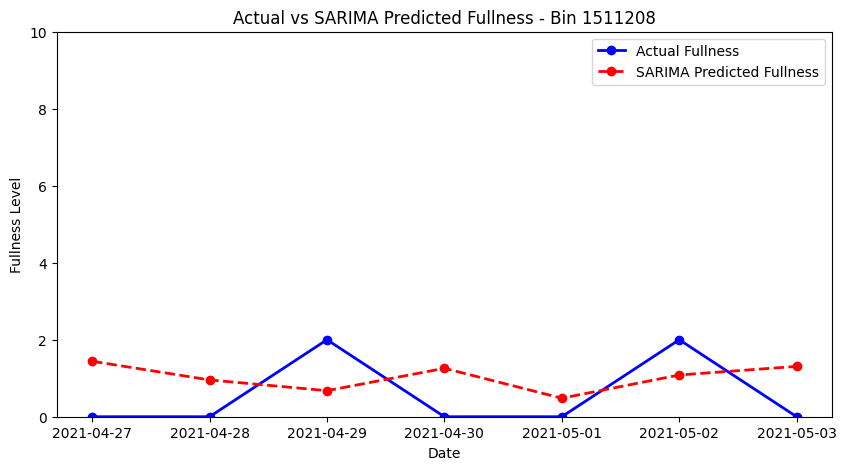

c:\Users\dhyey\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dhyey\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dhyey\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\dhyey\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the 

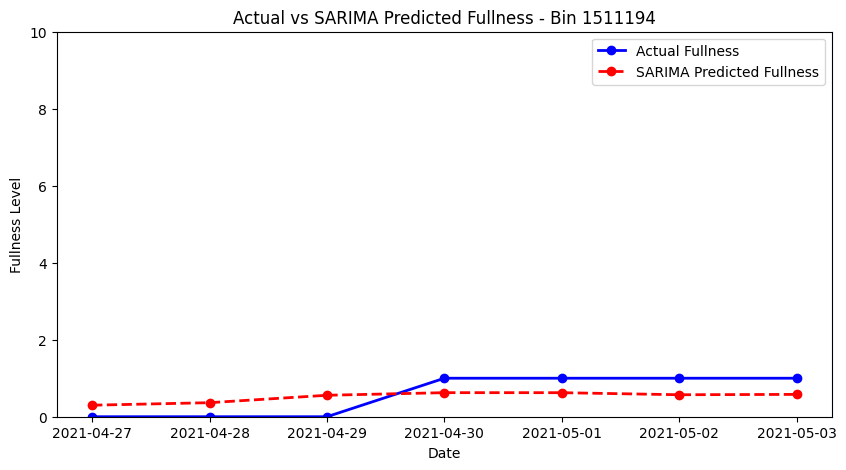

c:\Users\dhyey\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dhyey\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dhyey\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\dhyey\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction 

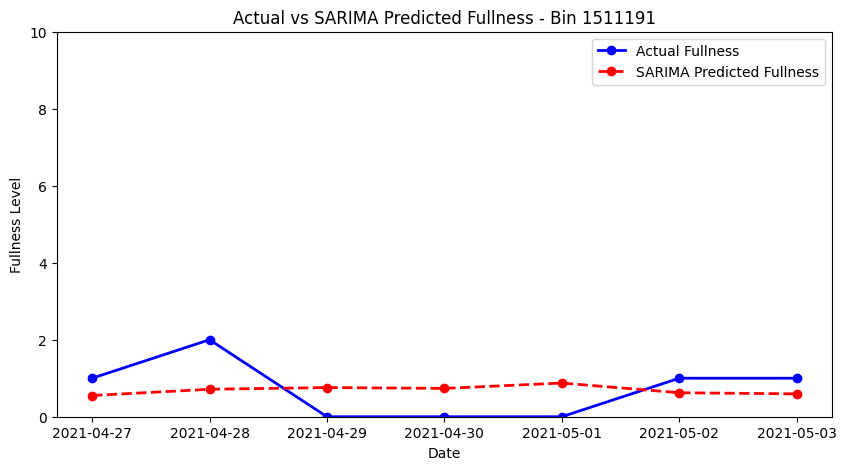

SARIMA RMSE:
             RMSE
Bin ID           
1511208  1.140472
1511194  0.409827
1511191  0.760235


In [9]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

results_sarima = {}
for bin_id in bins_to_forecast:
    # Prepare training data for this bin
    bin_train = train_data[train_data['Bin ID'] == bin_id].sort_values(by='timestamp')
    bin_train['timestamp'] = pd.to_datetime(bin_train['timestamp'])
    bin_train = bin_train.set_index('timestamp')
    
    ts = bin_train['Fullness']
    
    # Fit a SARIMA model (non-seasonal order (1,1,1) and seasonal_order (1,1,1,7))
    model_sarima = SARIMAX(ts, order=(1,1,1), seasonal_order=(1,1,1,7))
    model_sarima_fit = model_sarima.fit(disp=False)
    
    # Forecast the next 7 days
    forecast_sarima = model_sarima_fit.forecast(steps=7)
    predictions_sarima = forecast_sarima.values.reshape(-1, 1)
    
    # Define prediction period: 27th April to 3rd May
    prediction_start = pd.to_datetime("2021-04-27")
    prediction_end = pd.to_datetime("2021-05-03")
    prediction_dates = pd.date_range(start=prediction_start, end=prediction_end, freq='D')
    
    # Use the full dataset to get actual values for the prediction period
    bin_full = df[df['Bin ID'] == bin_id].sort_values(by='timestamp')
    bin_full['timestamp'] = pd.to_datetime(bin_full['timestamp'])
    bin_full = bin_full.set_index('timestamp')
    daily_actual = bin_full['Fullness'].resample('D').last()
    daily_actual = daily_actual.reindex(prediction_dates).fillna(method='ffill').fillna(method='bfill')
    prediction_actual = daily_actual.values.reshape(-1, 1)
    
    # Calculate RMSE using the actual values for the prediction period
    rmse_sarima = np.sqrt(mean_squared_error(prediction_actual, predictions_sarima))
    results_sarima[bin_id] = rmse_sarima

    # Plot actual vs predicted values for the prediction period
    plt.figure(figsize=(10, 5))
    plt.plot(prediction_dates, prediction_actual, 'bo-', label="Actual Fullness", linewidth=2)
    plt.plot(prediction_dates, predictions_sarima, 'ro--', label="SARIMA Predicted Fullness", linewidth=2)
    plt.ylim(0, 10)
    plt.title(f"Actual vs SARIMA Predicted Fullness - Bin {bin_id}")
    plt.xlabel("Date")
    plt.ylabel("Fullness Level")
    plt.legend()
    plt.show()

# Display SARIMA RMSE values
rmse_sarima_df = pd.DataFrame.from_dict(results_sarima, orient='index', columns=['RMSE'])
rmse_sarima_df.index.name = "Bin ID"
print("SARIMA RMSE:")
print(rmse_sarima_df)
